In [1]:
from afinn import Afinn
import matplotlib.pyplot as plt

In [2]:
texts = [
    "Elon Musk is a champion of free speech",
    "It's a terrible shame to see mashed potato thrown at art"
]

afinn = Afinn()
scores = [afinn.score(t) for t in texts]

In [3]:
afinn.score_with_wordlist(texts[0])

3.0

In [4]:
print(list(zip(texts,scores)))

[('Elon Musk is a champion of free speech', 3.0), ("It's a terrible shame to see mashed potato thrown at art", -5.0)]


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

lex = pd.DataFrame(afinn._dict.items(),columns=["word","value"])
lex.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [6]:
vec = CountVectorizer()
dfmat = vec.fit_transform(texts)
dfmat

<2x17 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [7]:
import numpy as np

def tidy_dfmat(dfmat, vec):
    nz = dfmat.nonzero()
    text_df = pd.DataFrame({
        "document": np.array(texts)[nz[0]],
        "term": vec.get_feature_names_out()[nz[1]],
        "count": dfmat[nz].A1
    })
    return text_df
text_df = tidy_dfmat(dfmat, vec)
text_df.head()

,document,term,count
0,Elon Musk is a champion of free speech,elon,1
1,Elon Musk is a champion of free speech,musk,1
2,Elon Musk is a champion of free speech,is,1
3,Elon Musk is a champion of free speech,champion,1
4,Elon Musk is a champion of free speech,of,1


In [8]:
text_tokens = text_df.merge(lex, left_on="term", right_on="word")
text_tokens["value"] *= text_tokens["count"]
text_tokens

,document,term,count,word,value
0,Elon Musk is a champion of free speech,champion,1,champion,2
1,Elon Musk is a champion of free speech,free,1,free,1
2,It's a terrible shame to see mashed potato thr...,terrible,1,terrible,-3
3,It's a terrible shame to see mashed potato thr...,shame,1,shame,-2


In [9]:
doc_sentiments = text_tokens.groupby("document")["value"].sum()
doc_sentiments

document
Elon Musk is a champion of free speech                      3
It's a terrible shame to see mashed potato thrown at art   -5
Name: value, dtype: int64

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("Bus delayed again. Great! Then I will miss the class")
#analyzer.polarity_scores("I hate text as data")

{'neg': 0.235, 'neu': 0.47, 'pos': 0.295, 'compound': 0.4389}

In [15]:
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
relative_path_SC = r'datasets\YesScotlandTweets.csv'
relative_path_UK = r'datasets\UkTogetherTweets.csv'
relative_path_SC_c = r'datasets\YesScotlandTweets_cleaned.csv'
relative_path_UK_c = r'datasets\UkTogetherTweets_cleaned.csv'
full_path_SC = os.path.join(parent_dir, relative_path_SC)
full_path_UK = os.path.join(parent_dir, relative_path_UK)
full_path_SC_c = os.path.join(parent_dir, relative_path_SC_c)
full_path_UK_c = os.path.join(parent_dir, relative_path_UK_c)

In [16]:
with open(full_path_SC, "r", encoding="unicode_escape") as f:
    with open(full_path_SC, "w") as out:
        for i,l in enumerate(f):
            l = l.strip('";\n').replace('""','"').replace('&amp";','&amp;').replace('&amp;"','&amp;').replace('";"','""')
            l = l.replace('&gt;"','&gt;').replace('&gt";','&gt;')
            out.write(l)
            out.write("\n")

In [17]:
with open(full_path_UK, "r", encoding="unicode_escape") as f:
    with open(full_path_UK, "w") as out:
        for i,l in enumerate(f):
            l = l.strip('";\n').replace('""','"').replace('&amp";','&amp;').replace('&amp;"','&amp;').replace('";"','""')
            l = l.replace('&gt;"','&gt;').replace('&gt";','&gt;')
            out.write(l)
            out.write("\n")

In [18]:
yes = pd.read_csv(full_path_SC_c)
yes["campaign"] = "YesScotland"
no = pd.read_csv(full_path_UK_c)
no["campaign"] = "UkTogether"
df = pd.concat([yes, no]).reset_index(drop=True)

print(df.shape)
df.head()

(2857, 18)


,x,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,campaign
0,1,"Thank you, everyone! #indyref http://t.co/1kTz...",False,1744,NaN,2014-09-18 21:01,False,NaN,5.130000e+17,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",YesScotland,2167,False,False,NaN,NaN,YesScotland
1,2,"As the polls close, total likes on the @YesSco...",False,540,NaN,2014-09-18 20:57,False,NaN,5.130000e+17,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",YesScotland,449,False,False,NaN,NaN,YesScotland
2,1,RT @STVGlasgow: BAE Systems put Î£200m Scotsto...,False,0,NaN,2014-09-26 14:44,False,NaN,5.160000e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",UK_Together,47,True,False,NaN,NaN,UkTogether
3,2,Scotland has voted for unity. Let's move forwa...,False,1969,NaN,2014-09-19 5:55,False,NaN,5.130000e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",UK_Together,1675,False,False,NaN,NaN,UkTogether
4,3,.@blairmcdougall thanks supporters and staff a...,False,77,NaN,2014-09-19 3:21,False,NaN,5.130000e+17,NaN,"<a href=""http://www.apple.com"" rel=""nofollow"">...",UK_Together,49,False,False,NaN,NaN,UkTogether


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

results = [analyzer.polarity_scores(x) for x in df["text"]]
sentiment = pd.DataFrame.from_dict(results)

sentiment_df = pd.concat([df,sentiment], axis=1)
sentiment_df.head()

,x,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,...,retweetCount,isRetweet,retweeted,longitude,latitude,campaign,neg,neu,pos,compound
0,1,"Thank you, everyone! #indyref http://t.co/1kTz...",False,1744,NaN,2014-09-18 21:01,False,NaN,5.130000e+17,NaN,...,2167,False,False,NaN,NaN,YesScotland,0.000,0.589,0.411,0.4199
1,2,"As the polls close, total likes on the @YesSco...",False,540,NaN,2014-09-18 20:57,False,NaN,5.130000e+17,NaN,...,449,False,False,NaN,NaN,YesScotland,0.000,0.853,0.147,0.4754
2,1,RT @STVGlasgow: BAE Systems put Î£200m Scotsto...,False,0,NaN,2014-09-26 14:44,False,NaN,5.160000e+17,NaN,...,47,True,False,NaN,NaN,UkTogether,0.116,0.884,0.000,-0.1779
3,2,Scotland has voted for unity. Let's move forwa...,False,1969,NaN,2014-09-19 5:55,False,NaN,5.130000e+17,NaN,...,1675,False,False,NaN,NaN,UkTogether,0.000,1.000,0.000,0.0000
4,3,.@blairmcdougall thanks supporters and staff a...,False,77,NaN,2014-09-19 3:21,False,NaN,5.130000e+17,NaN,...,49,False,False,NaN,NaN,UkTogether,0.000,0.707,0.293,0.7003


In [22]:
sentiment_df.sort_values("compound").head()[["text","compound"]].values

array([['.@TogetherAlistairDarling - "The nationalist threat to default on our debt is irresponsible and reckless." http://t.co/xQSWYauTgg',
        -0.8885],
       ['Salmond warned that reckless threat to default on debt could lead to higher mortgage payments for Scots http://t.co/2Nmk95diKP #indyref',
        -0.8658],
       ["RT @Kevin_Maguire: However much I hate banksters, hedgies, speculators et al I think Salmond threatening to defaul on Scotland's debt is un\x8a\x97_",
        -0.8625],
       ["Top economists cast doubt on SNP currency plans and slam Salmond's debt default threat http://t.co/xpRoVJzqPt #indyref",
        -0.8481],
       ['Kezia Dugdale confronts the SNP with their own dismal record on child poverty. #scotdecides',
        -0.8481]], dtype=object)

In [23]:
sentiment_df.sort_values("compound", ascending=False).head()[["text","compound"]].values

array([['RT @dobbs_michael: Off to Edinburgh. Yesterday great campaigning in W Scotland, smiles, great support. Hope to find many more proud Scots t\x8a\x97_',
        0.9652],
       ['Merry Christmas from all at #BetterTogether, wishing everyone a happy and peaceful festive season.',
        0.936],
       ['RT @Moray_Together: Great meeting tonight! Strong support for our campaign. Thanks to panelists and all who attended! #BetterTogether http:\x8a\x97_',
        0.9272],
       ['Huge congrats to @strathy_uk on winning #StrathIndyRef! A great campaign from our student activists &amp; youth reps #indyref',
        0.9259],
       ['RT @PeterWHiggins: Fantastic turnout and very strong support for @UK_Together when out in Stirlingshire today. Thanks again everyone! http:\x8a\x97_',
        0.9241]], dtype=object)

In [24]:
sentiment_df["date"] = pd.to_datetime(df.created).dt.date
daily_sentiment = (sentiment_df
                   .groupby(["date","campaign"])["compound"]
                   .mean()
                   .reset_index()
                   .pivot_table(columns="campaign", values="compound", index="date")
                   .reset_index()
                  )

daily_sentiment["date"] = pd.to_datetime(daily_sentiment["date"])
days = pd.date_range(start="2014-06-01",end="2014-09-18")
daily_sentiment = pd.DataFrame({"date": days}).merge(daily_sentiment, how="left")
daily_sentiment

,date,UkTogether,YesScotland
0,2014-06-01,0.647000,NaN
1,2014-06-02,0.228642,NaN
2,2014-06-03,0.174267,NaN
3,2014-06-04,0.209287,NaN
4,2014-06-05,0.202725,NaN
...,...,...,...
105,2014-09-14,0.301605,NaN
106,2014-09-15,0.345212,NaN
107,2014-09-16,0.056021,NaN
108,2014-09-17,0.516338,NaN


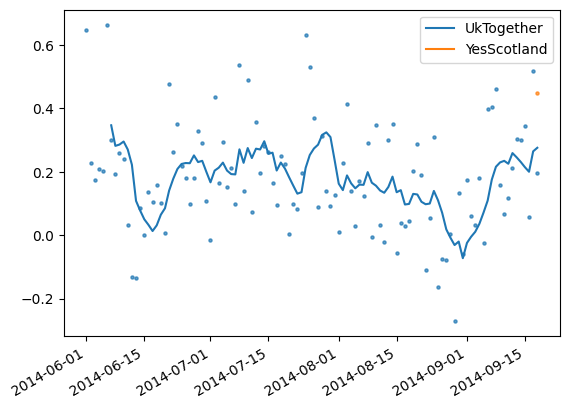

In [26]:
fig, ax = plt.subplots()

for campaign in ["UkTogether", "YesScotland"]:
    ax.scatter(daily_sentiment.date, daily_sentiment[campaign], s=5, alpha=0.7)
    x = daily_sentiment[campaign].rolling(7).mean()
    ax.plot(daily_sentiment.date, x, label=campaign)

fig.autofmt_xdate()
ax.legend()